# Manifold exploration
Exploring the loss manifold using multiple trajectories from corner points in the diffusion map

In [1]:
import sys
sys.path.append('/Users/zofia/packages/DataDrivenSampler-0.3/lib/python3.6/site-packages')

In [2]:
from DataDrivenSampler.models.model import model
from DataDrivenSampler.exploration.explorer import Explorer
import numpy as np
FLAGS = model.setup_parameters(
    batch_data_files=["dataset-twoclusters.csv"],
    batch_size=500,
    diffusion_map_method="vanilla",
    max_steps=10,
    number_of_eigenvalues=1,
    optimizer="GradientDescent",
    output_activation="linear",
    sampler="BAOAB",
    seed=426,
    step_width=1e-2,
    use_reweighting=False
)
nn = model(FLAGS)
# init both sample and train right away
nn.init_network(None, setup="sample")
nn.init_network(None, setup="train")
explorer = Explorer(max_legs=5, number_pruning=0)
print("Creating starting trajectory.")
# a. add three legs to queue
explorer.spawn_starting_trajectory(nn)
# b. continue until queue has run dry
explorer.run_all_jobs(nn, FLAGS)
print("Starting multiple explorations from starting trajectory.")
# 2. with the initial trajectory done and analyzed,
#    find maximally separate points and sample from these
max_exploration_steps = 2
exploration_step = 1
while exploration_step < max_exploration_steps:
    # a. combine all trajectories
    parameters, losses = explorer.combine_trajectories()
    # b. perform diffusion map analysis for eigenvectors
    idx_corner = explorer.get_corner_points(parameters, losses, FLAGS, number_of_corner_points=1)
    # d. spawn new trajectories from these points
    explorer.spawn_corner_trajectories(parameters, losses,
                                               idx_corner, nn)
    # d. run all trajectories till terminated
    explorer.run_all_jobs(nn, FLAGS)
    exploration_step += 1

nn.finish()
run_info, trajectory = explorer.get_run_info_and_trajectory()
print("Exploration results")
print(np.asarray(run_info[0:10]))
print(np.asarray(trajectory[0:10]))


/Users/zofia/miniconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Parsing ['dataset-twoclusters.csv']
(TensorShape([Dimension(None), Dimension(2)]), TensorShape([Dimension(None), Dimension(1)]))
(tf.float32, tf.int32)
Picking as input columns: ['x1', 'x2']
x is (?, 2)
Creating nn layer output with 2, 1
Setting up output files for sample
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 1) dtype=float64_ref>
Placeholder: Tensor("Placeholder:0", shape=(2, 1), dtype=float64)
Weight: <tf.Variable 'output/biases/Variable:0' shape=(1,) dtype=float64_ref>
Placeholder: Tensor("Placeholder_1:0", shape=(1,), dtype=float64)
Setting up output files for train
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 1) dtype=float64_ref>
Placeholder: Tensor("Placeholder_2:0", shape=(2, 1), dtype=float64)
Weight: <tf.Variable 'output/biases/Variable:0' shape=(1,) dtype=float64_ref>
Placeholder: Tensor("Placeholder_3:0", shape=(1,), dtype=float64)
Creating starting trajectory.
Current job #1: run
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 

SAMPLED.
Step: 60.0
Losses (first and last five): [0.758147538, 0.904165089, 1.06041634, 1.22583675, 1.39929938]
 ... 
[1.57962203, 1.76557612, 1.95589447, 2.14928031, 2.34441614]
Gradients (first and last five): [0.049614359, 0.0543995094, 0.0590922718, 0.0636845904, 0.0681686002]
 ... 
[0.0725366286, 0.0767812083, 0.0808950938, 0.0848712607, 0.0887029248]
Parameters (first and last five): [['5.40779194e-01' '3.55268354e-01' '8.92867406e-02']
 ['5.59858018e-01' '3.75903113e-01' '8.87624644e-02']
 ['5.78560688e-01' '3.96145108e-01' '8.82250087e-02']
 ['5.96855030e-01' '4.15960157e-01' '8.76742865e-02']
 ['6.14709561e-01' '4.35314813e-01' '8.71102171e-02']]
 ... 
[['6.32093542e-01' '4.54176421e-01' '8.65327263e-02']
 ['6.48977025e-01' '4.72513169e-01' '8.59417468e-02']
 ['6.65330913e-01' '4.90294148e-01' '8.53372185e-02']
 ['6.81127000e-01' '5.07489400e-01' '8.47190885e-02']
 ['6.96338026e-01' '5.24069973e-01' '8.40873118e-02']]
Continue? True
Added analyze job
Current job #10: analyze


Has eigendecompostion converged? False
Continue? True
Maximum number of legs exceeded, stopping anyway.
Current job #24: extract_minimium_candidates
Found minima candidates: []
Continue? False
Not adding.
Exploration results
[[1.0 0.0 '0.000' '4.80055332e+00' '5.77090000e-02' '4.80258170e+00'
  '2.02837634e-03' '6.36926423e-02' '1.27385285e-01' '2.61711285e+00'
  '0.00000000e+00' '2.02837634e-03' '2.61711285e+00']
 [2.0 1.0 '0.000' '4.78434038e+00' '9.39500000e-03' '4.80257505e+00'
  '1.82346640e-02' '1.90969443e-01' '1.27168316e-01' '2.60457189e+00'
  '0.00000000e+00' '1.01315202e-02' '2.61084237e+00']
 [3.0 2.0 '0.000' '4.75202465e+00' '7.52300000e-03' '4.80256152e+00'
  '5.05368732e-02' '3.17920975e-01' '1.26734749e-01' '2.57959412e+00'
  '0.00000000e+00' '2.35999712e-02' '2.60042629e+00']
 [4.0 3.0 '0.000' '4.70382547e+00' '6.95000000e-03' '4.80254050e+00'
  '9.87150233e-02' '4.44331010e-01' '1.26085322e-01' '2.54238712e+00'
  '0.00000000e+00' '4.23787342e-02' '2.58591650e+00']
 [5

In [3]:
import pandas as pd 
df = pd.DataFrame(trajectory)
df.to_csv("run_exploration.csv")

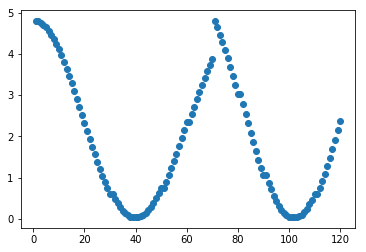

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_run = pd.read_csv("run_exploration.csv", sep=',', header=0)
run=np.asarray(df_run.loc[:,['step','loss','kinetic_energy', 'total_energy']])
plt.scatter(run[:,0], run[:,1])
#plt.savefig('loss-step.png', bbox_inches='tight')
plt.show()
